# Libraries

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import Data

In [2]:
df_segmentation = pd.read_csv('customer.csv', index_col = 0)

# Explore Data

In [3]:
df_segmentation.head()

,Jenis Kelamin,Status,Umur,Pendidikan,Pendapatan,Pekerjaan,Wilayah
ID,,,,,,,
100000001,0,1,67,2,3246,0,2
100000002,1,0,22,1,2574,1,2
100000003,1,1,49,1,957,0,0
100000004,1,1,45,1,3268,1,1
100000005,1,1,53,1,2847,1,1


In [4]:
df_segmentation.describe()

,Jenis Kelamin,Status,Umur,Pendidikan,Pendapatan,Pekerjaan,Wilayah
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.54800,0.643000,35.546000,0.942000,1993.890000,0.890000,0.928000
std,0.49794,0.479355,11.375469,0.592442,989.946107,0.616669,0.833973
min,0.00000,0.000000,19.000000,0.000000,450.000000,0.000000,0.000000
25%,0.00000,0.000000,27.000000,1.000000,1309.000000,0.000000,0.000000
50%,1.00000,1.000000,33.000000,1.000000,1755.500000,1.000000,1.000000
75%,1.00000,1.000000,42.000000,1.000000,2454.000000,1.000000,2.000000
max,1.00000,1.000000,75.000000,2.000000,5920.000000,2.000000,2.000000


# Standardisasi

In [5]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Pengelompokan Hierarki

In [6]:
hier_clust = linkage(segmentation_std, method = 'ward')

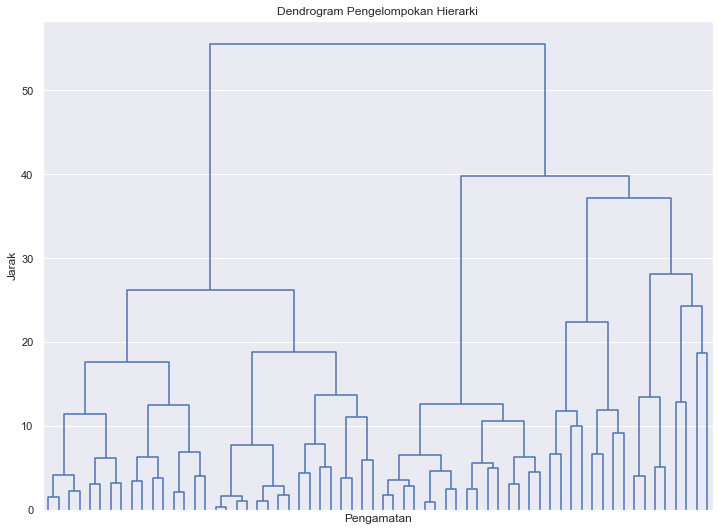

In [7]:
plt.figure(figsize = (12,9))
plt.title('Dendrogram Pengelompokan Hierarki')
plt.xlabel('Pengamatan')
plt.ylabel('Jarak')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True,
           color_threshold = 0)
plt.show()

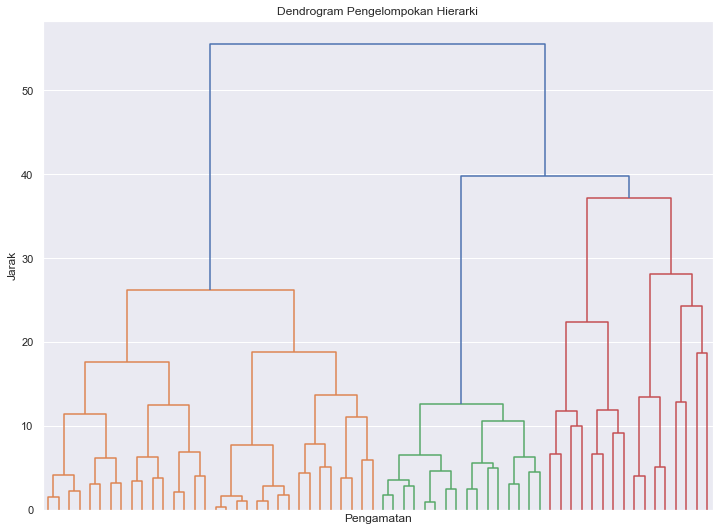

In [8]:
plt.figure(figsize = (12,9))
plt.title('Dendrogram Pengelompokan Hierarki')
plt.xlabel('Pengamatan')
plt.ylabel('Jarak')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

# K-Means Clustering

In [9]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = [] #menyimpan nilai Within-Cluster-Sum-of-Squares utk jml cluster 1 hingga 11
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

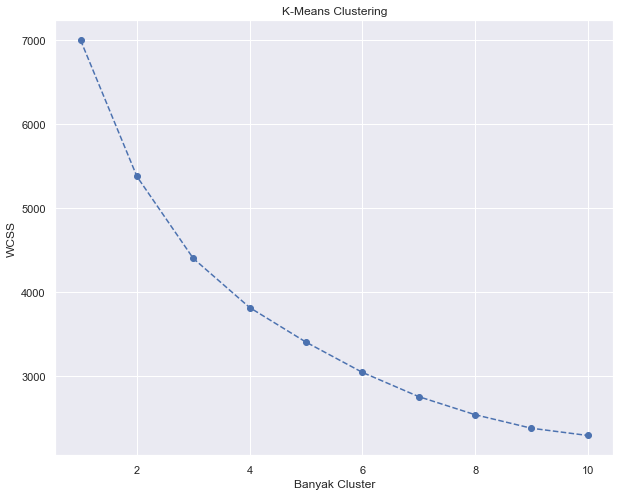

In [10]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Banyak Cluster')
plt.ylabel('WCSS')
plt.title('K-Means Clustering')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [12]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=3, random_state=42)

# Perkiraan Korelasi (Hubungan)

In [13]:
df_segmentation.corr()

,Jenis Kelamin,Status,Umur,Pendidikan,Pendapatan,Pekerjaan,Wilayah
Jenis Kelamin,1.000000,0.052992,0.045027,-0.004126,0.002588,0.033512,-0.008543
Status,0.052992,1.000000,0.665254,0.378188,0.148459,0.043108,-0.006771
Umur,0.045027,0.665254,1.000000,0.640420,0.137456,-0.131986,-0.063803
Pendidikan,-0.004126,0.378188,0.640420,1.000000,0.077352,-0.146257,-0.152306
Pendapatan,0.002588,0.148459,0.137456,0.077352,1.000000,0.631007,0.285788
Pekerjaan,0.033512,0.043108,-0.131986,-0.146257,0.631007,1.000000,0.515950
Wilayah,-0.008543,-0.006771,-0.063803,-0.152306,0.285788,0.515950,1.000000


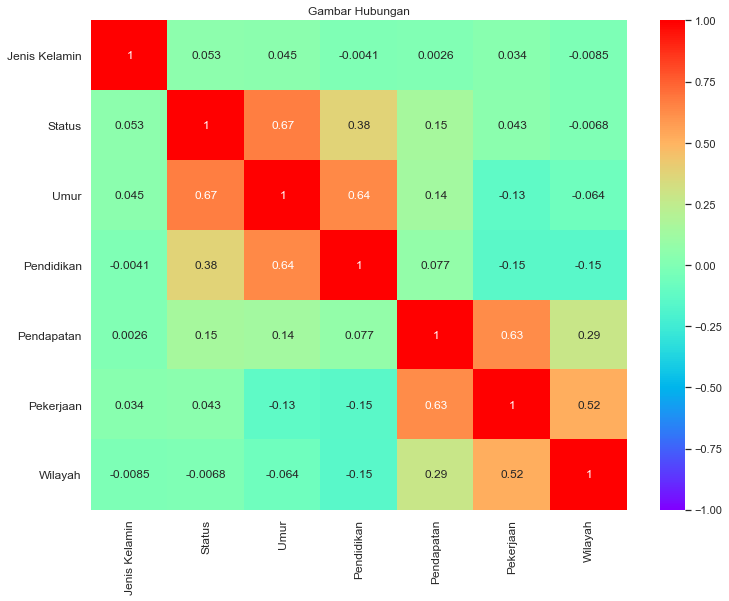

In [14]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'rainbow',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Gambar Hubungan')
plt.show()

# Hasil

In [15]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segmentasi K-Means'] = kmeans.labels_

In [16]:
df_segm_analysis = df_segm_kmeans.groupby(['Segmentasi K-Means']).mean()
df_segm_analysis

,Jenis Kelamin,Status,Umur,Pendidikan,Pendapatan,Pekerjaan,Wilayah
Segmentasi K-Means,,,,,,,
0,0.540541,0.996139,45.675676,1.378378,1621.617761,0.339768,0.193050
1,0.570707,0.952020,37.871212,0.934343,2541.204545,1.333333,1.439394
2,0.527536,0.023188,25.272464,0.623188,1645.142029,0.794203,0.892754


In [17]:
df_segm_analysis['Jum Pengamatan'] = df_segm_kmeans[['Segmentasi K-Means', 'Jenis Kelamin']].groupby(['Segmentasi K-Means']).count()

In [18]:
df_segm_analysis['Prop Pengamatan'] = df_segm_analysis['Jum Pengamatan'] / df_segm_analysis['Jum Pengamatan'].sum()

In [19]:
df_segm_analysis

,Jenis Kelamin,Status,Umur,Pendidikan,Pendapatan,Pekerjaan,Wilayah,Jum Pengamatan,Prop Pengamatan
Segmentasi K-Means,,,,,,,,,
0,0.540541,0.996139,45.675676,1.378378,1621.617761,0.339768,0.193050,259,0.259
1,0.570707,0.952020,37.871212,0.934343,2541.204545,1.333333,1.439394,396,0.396
2,0.527536,0.023188,25.272464,0.623188,1645.142029,0.794203,0.892754,345,0.345


In [20]:
df_segm_analysis.rename({0:'Tidak Konsumtif',
                        1:'Konsumtif',
                        2:'Milenial'})

,Jenis Kelamin,Status,Umur,Pendidikan,Pendapatan,Pekerjaan,Wilayah,Jum Pengamatan,Prop Pengamatan
Segmentasi K-Means,,,,,,,,,
Tidak Konsumtif,0.540541,0.996139,45.675676,1.378378,1621.617761,0.339768,0.193050,259,0.259
Konsumtif,0.570707,0.952020,37.871212,0.934343,2541.204545,1.333333,1.439394,396,0.396
Milenial,0.527536,0.023188,25.272464,0.623188,1645.142029,0.794203,0.892754,345,0.345


In [21]:
df_segm_kmeans['Label'] = df_segm_kmeans['Segmentasi K-Means'].map({0:'Tidak Konsumtif',
                                                                    1:'Konsumtif',
                                                                    2:'Milenial'})

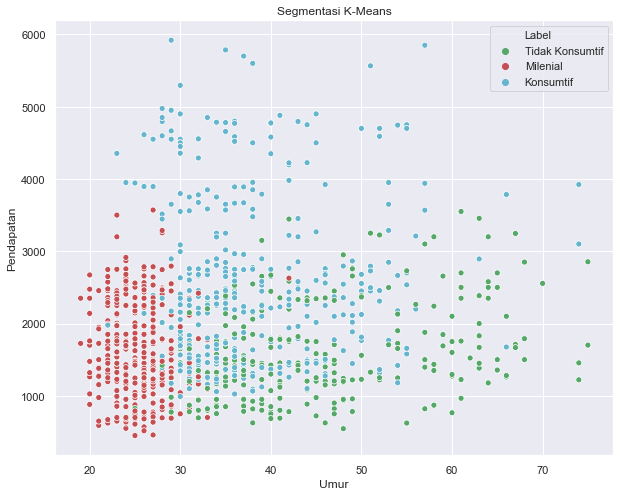

In [22]:
x_axis = df_segm_kmeans['Umur']
y_axis = df_segm_kmeans['Pendapatan']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Label'], palette = ['g','r','c'])
plt.title('Segmentasi K-Means')
plt.show()